## Description
This file is used to check the distribution of words used in each project, and then compare the results in various ways. 

## Read Files
First we will read the result from previous work, in which we get python files from internet, parse them to get all the variable and function names (and their scope, might be useful later), and then we parse the variable and function names into terms (in a primitive way). 

In [67]:
import pandas as pd
import sqlite3
name_table = "NameTable"
conn = sqlite3.connect('data.db')
query = f"SELECT * FROM {name_table}"
df = pd.read_sql_query(query, conn)
import json
df['terms'] = df.terms.apply(json.loads)
df

,id,name,nameType,nameScope,author,project_name,terms,namingConvention
0,0,sovits_path,variable,GlobalScope,Chinese,GPT-SoVITS,"[sovits, path]",Snake
1,1,gpt_path,variable,GlobalScope,Chinese,GPT-SoVITS,"[gpt, path]",Snake
2,2,is_half_str,variable,GlobalScope,Chinese,GPT-SoVITS,"[is, half, str]",Snake
3,3,is_half,variable,GlobalScope,Chinese,GPT-SoVITS,"[is, half]",Snake
4,4,is_share_str,variable,GlobalScope,Chinese,GPT-SoVITS,"[is, share, str]",Snake
...,...,...,...,...,...,...,...,...
839640,839640,next_function,variable,FunctionScope,English,django,"[next, function]",Snake
839641,839641,model_class,variable,FunctionScope,English,django,"[model, class]",Snake
839642,839642,app_config,variable,FunctionScope,English,django,"[app, config]",Snake
839643,839643,app_config,variable,FunctionScope,English,django,"[app, config]",Snake


In [68]:
import nltk
# nltk.download('words')
# nltk.download('brown')


## Average Length of Names

Maybe we should save this back to dataframe

In [69]:
import re
def count_length_by_letter(name):
    # we don't count numbers and underscore
    pattern = r'[0-9_]'
    name = re.sub(pattern, '', name)
    return len(name)

df["lengthByLetter"] = df['name'].apply(count_length_by_letter)
df['lengthByWord'] = df['terms'].apply(len)
df = df[(df['lengthByLetter'] > 0) & (df['lengthByWord'] > 0)]

### Length by Letter

In [70]:
print("Average Length (by letter) of Chinese-speaking Programmers are: ")
print(df[df['author'] == 'Chinese']['lengthByLetter'].mean())
print("Average Length (by letter) of English-speaking Programmers are: ")
print(df[df['author'] == 'English']['lengthByLetter'].mean())

Average Length (by letter) of Chinese-speaking Programmers are: 
7.741401394753072
Average Length (by letter) of English-speaking Programmers are: 
10.084241326732116


Let's add the brown's data. Frequency is calculated by (number of word with length k) / (number of words) for each k. 

In [71]:
from nltk.corpus import brown
# Get the words from the Brown Corpus
brown_words = brown.words()
# get length of brown words
total_words = len(brown_words)
# Calculate word frequencies
dic_brown_word_freq = nltk.FreqDist(brown_words)
# normalize the word frequency
dic_brown_word_freq = {word: freq / total_words for word, freq in dic_brown_word_freq.items()}
# put the normalized word frequency into pandas series 
df_brown_word_freq = pd.DataFrame.from_dict(dic_brown_word_freq, orient='index').reset_index()
df_brown_word_freq.columns = ['word', 'proportion']
# calculate length of letters frequency 
df_brown_word_freq['lengthByLetter'] = df_brown_word_freq['word'].apply(len)
df_brown_letter_len_freq = df_brown_word_freq.groupby('lengthByLetter')['proportion'].sum()

In [72]:

df_chinese_letter_len_freq = df[df['author'] == 'Chinese']['lengthByLetter'].value_counts(normalize=True).sort_index()
df_english_letter_len_freq = df[df['author'] == 'English']['lengthByLetter'].value_counts(normalize=True).sort_index()


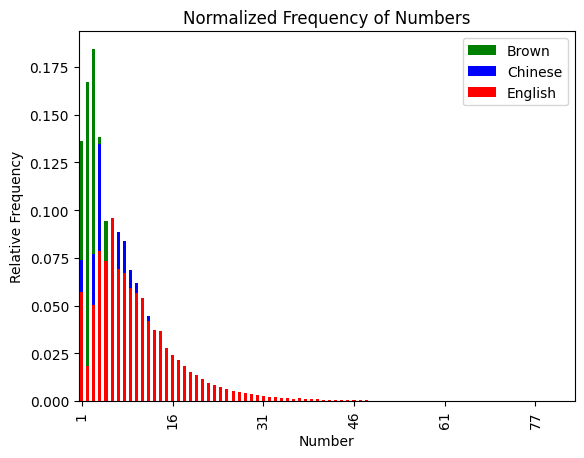

In [73]:
import matplotlib.pyplot as plt
df_brown_letter_len_freq.plot(kind='bar', color='green', label='Brown')
df_chinese_letter_len_freq.plot(kind='bar', color='blue', label='Chinese')
df_english_letter_len_freq.plot(kind='bar', color='red', label='English')
# Adding labels and title
plt.xlabel('Number')
plt.ylabel('Relative Frequency')
plt.title('Normalized Frequency of Numbers')
plt.legend()
# show less x labels
plt.gca().xaxis.set_major_locator(plt.MaxNLocator(7))  # Adjust '5' to display the desired number of ticks

# Showing the plot
plt.show()

The cdf version

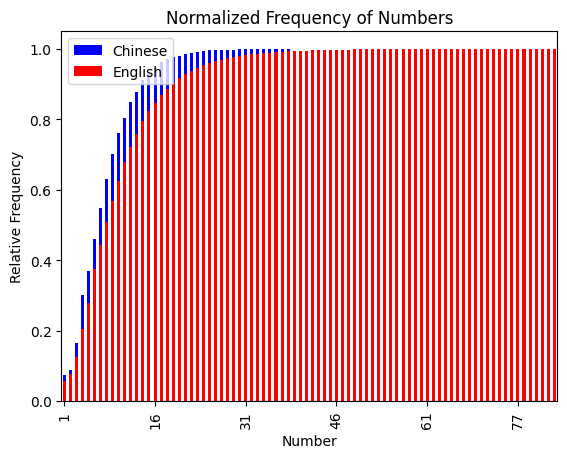

In [78]:
import matplotlib.pyplot as plt
# df_brown_letter_len_freq.cumsum().plot(kind='bar', color='green', label='Brown')
df_chinese_letter_len_freq.cumsum().plot(kind='bar', color='blue', label='Chinese')
df_english_letter_len_freq.cumsum().plot(kind='bar', color='red', label='English')
# Adding labels and title
plt.xlabel('Number')
plt.ylabel('Relative Frequency')
plt.title('Normalized Frequency of Numbers')
plt.legend()
# show less x labels
plt.gca().xaxis.set_major_locator(plt.MaxNLocator(7))  # Adjust '5' to display the desired number of ticks

# Showing the plot
plt.show()

Plot them separately

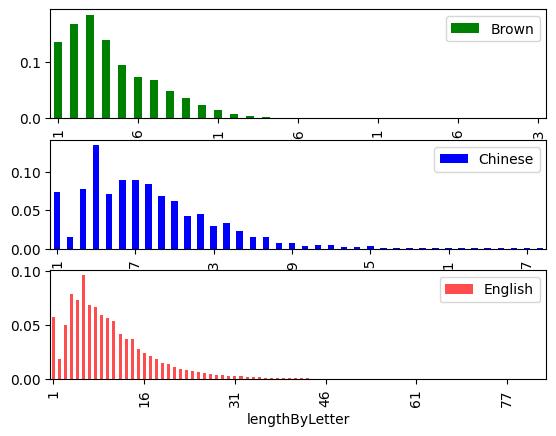

In [74]:
import matplotlib.pyplot as plt
fig, axs = plt.subplots(3)

df_brown_letter_len_freq.plot(kind='bar', color='green', label='Brown', ax=axs[0])
df_chinese_letter_len_freq.plot(kind='bar', color='blue', label='Chinese', ax=axs[1])
df_english_letter_len_freq.plot(kind='bar', color='red', label='English', alpha=0.7, position=0.5, ax=axs[2])


for ax in axs:
    # show legend
    ax.legend()
    # show less x labels
    ax.xaxis.set_major_locator(plt.MaxNLocator(7))  # Adjust '5' to display the desired number of ticks


# Showing the plot
plt.show()

In [75]:
df_brown_letter_len_freq = df_brown_letter_len_freq.cumsum()
df_brown_letter_len_freq

lengthByLetter
1     0.136077
2     0.303303
3     0.487768
4     0.626052
5     0.720613
6     0.794364
7     0.861708
8     0.910793
9     0.945930
10    0.969987
11    0.983762
12    0.991699
13    0.995946
14    0.998177
15    0.999000
16    0.999376
17    0.999589
18    0.999769
19    0.999856
20    0.999898
21    0.999938
22    0.999961
23    0.999970
24    0.999975
25    0.999984
26    0.999987
27    0.999992
28    0.999995
29    0.999996
30    0.999999
33    1.000000
Name: proportion, dtype: float64

Let's see the CDF version

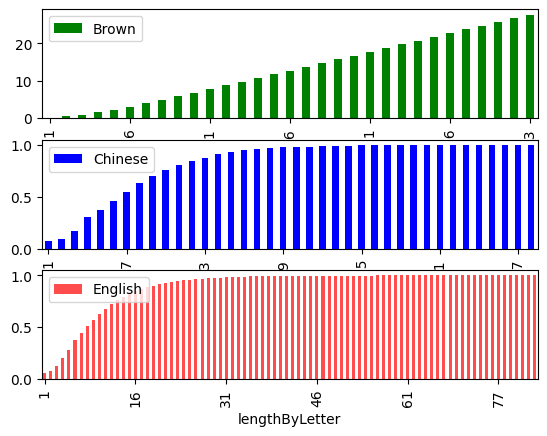

In [76]:
import matplotlib.pyplot as plt
fig, axs = plt.subplots(3)

df_brown_letter_len_freq.cumsum().plot(kind='bar', color='green', label='Brown', ax=axs[0])
df_chinese_letter_len_freq.cumsum().plot(kind='bar', color='blue', label='Chinese', ax=axs[1])
df_english_letter_len_freq.cumsum().plot(kind='bar', color='red', label='English', alpha=0.7, position=0.5, ax=axs[2])


for ax in axs:
    # show legend
    ax.legend()
    # show less x labels
    ax.xaxis.set_major_locator(plt.MaxNLocator(7))  # Adjust '5' to display the desired number of ticks


# Showing the plot
plt.show()



### Length by word

In [79]:
print("Average Length (by word) of Chinese-speaking Programmers are: ")
print(df[df['author'] == 'Chinese']['lengthByWord'].mean())
print("Average Length (by word) of English-speaking Programmers are: ")
print(df[df['author'] == 'English']['lengthByWord'].mean())

Average Length (by word) of Chinese-speaking Programmers are: 
1.7040182171829783
Average Length (by word) of English-speaking Programmers are: 
1.9800325006816828


In [80]:
df_chinese_word_len_freq = df[df['author'] == 'Chinese']['lengthByWord'].value_counts(normalize=True).sort_index()
df_english_word_len_freq = df[df['author'] == 'English']['lengthByWord'].value_counts(normalize=True).sort_index()


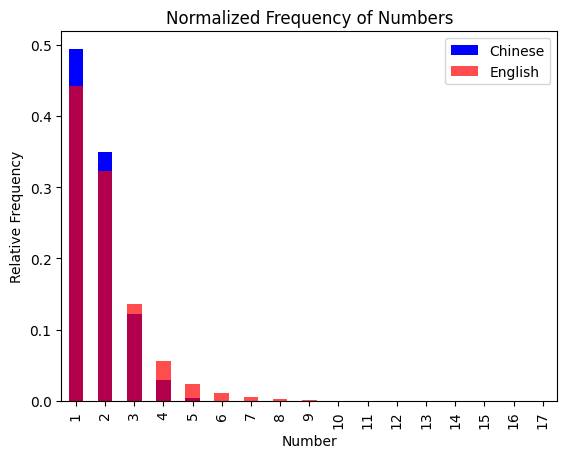

In [81]:
df_chinese_word_len_freq.plot(kind='bar', color='blue', label='Chinese')
df_english_word_len_freq.plot(kind='bar', color='red', label='English', alpha=0.7, position=0.5)
# Adding labels and title
plt.xlabel('Number')
plt.ylabel('Relative Frequency')
plt.title('Normalized Frequency of Numbers')
plt.legend()
# Showing the plot
plt.show()

the cdf

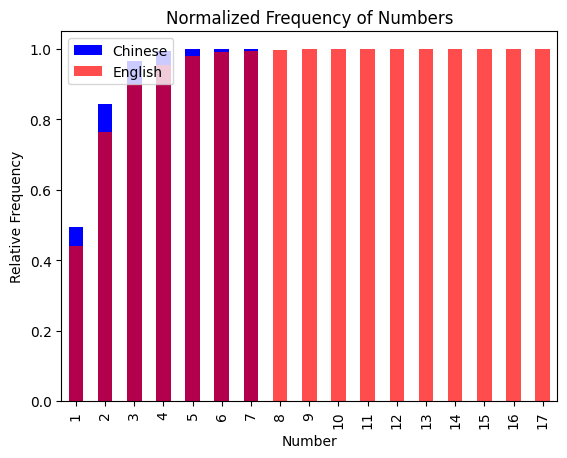

In [82]:
df_chinese_word_len_freq.cumsum().plot(kind='bar', color='blue', label='Chinese')
df_english_word_len_freq.cumsum().plot(kind='bar', color='red', label='English', alpha=0.7, position=0.5)
# Adding labels and title
plt.xlabel('Number')
plt.ylabel('Relative Frequency')
plt.title('Normalized Frequency of Numbers')
plt.legend()
# Showing the plot
plt.show()

### Length by letter X by word

Here we are trying to recreate Nitssan's Figure 3

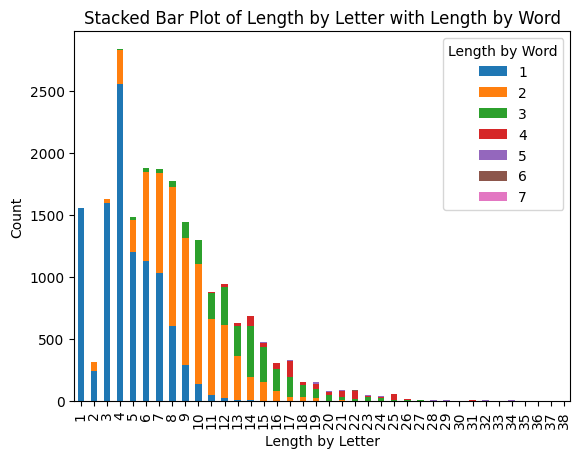

In [83]:
def plot_letterXword(df_language):
    # assume that the dataframe have both lengthByLetter and lengthByWord columns. 
    df_letterXword_len_freq = df_language.groupby(['lengthByLetter', 'lengthByWord']).size().reset_index(name='count')
    # pivot the dataframe
    pivot_df = df_letterXword_len_freq.pivot(index='lengthByLetter', columns='lengthByWord', values='count').fillna(0)
    # plot the dataframe
    pivot_df.plot(kind='bar', stacked=True)
    plt.xlabel('Length by Letter')
    plt.ylabel('Count')
    plt.title('Stacked Bar Plot of Length by Letter with Length by Word')
    plt.legend(title='Length by Word')
    plt.show()

df_chinese = df[df['author'] == 'Chinese']

plot_letterXword(df_chinese)

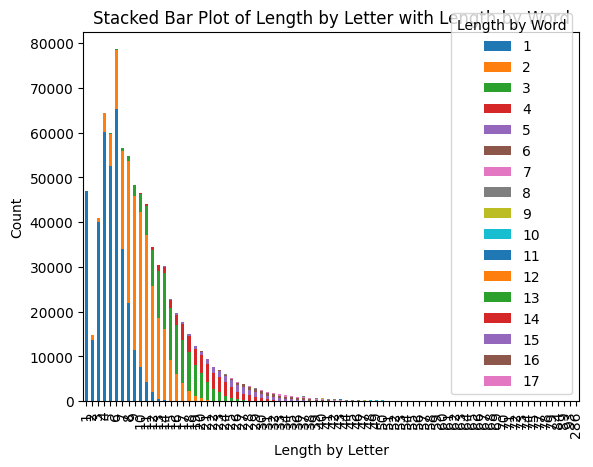

In [84]:
df_english = df[df['author'] == 'English']
plot_letterXword(df_english)


## Most Common Terms

Now let's see the number of occurrences for each word. I mean, let's first see the top 40. 

In [85]:
flattened_words_chinese = df[df['author'] == 'Chinese']['terms'].explode()
# Count the occurrences of each word
word_counts_chinese = flattened_words_chinese.value_counts()

In [86]:
word_counts_chinese.head(40)

terms
init        601
x           513
get         473
data        441
h           367
path        367
text        365
y           309
color       298
update      295
name        278
size        263
mask        246
list        230
forward     201
result      195
grid        184
set         182
all         175
file        173
lang        158
time        158
model       148
is          147
id          137
d           137
s           137
not         130
v           129
url         129
audio       128
language    127
info        126
new         125
r           124
output      122
p           122
dict        120
api         118
Policy      118
Name: count, dtype: int64

In [87]:
flattened_words_english = df[df['author'] == 'English']['terms'].explode()
# Count the occurrences of each word
word_counts_english = flattened_words_english.value_counts()

In [88]:
word_counts_english.head(40)

terms
test        58368
result      16962
state       15705
init        15519
x           14674
get         11969
name        10818
output      10703
data         9640
model        9137
input        8881
config       8779
device       8683
entry        8417
fn           7848
SYS          7556
id           7116
tensor       6860
forward      6824
to           6747
with         6512
entity       6225
out          6218
expected     6211
NR           5826
size         5792
Test         5654
default      5432
response     5380
is           5371
value        5273
y            5125
inputs       5117
attr         4998
new          4963
type         4850
a            4831
list         4608
all          4591
msg          4301
Name: count, dtype: int64

todo: single letter names - states - are they the same ones? Need to wait until we have the full data

In [89]:
df_chinese_word_freq = pd.DataFrame(word_counts_chinese.reset_index())
df_chinese_word_freq.rename(columns={"count": "frequency"}, inplace=True)
# normalize word frequency
df_chinese_word_freq['frequency'] = df_chinese_word_freq['frequency'] / df_chinese_word_freq['frequency'].sum()

df_english_word_freq = pd.DataFrame(word_counts_english.reset_index())
df_english_word_freq.rename(columns={"count": "frequency"}, inplace=True)
df_english_word_freq['frequency'] = df_english_word_freq['frequency'] / df_english_word_freq['frequency'].sum()


## Zipf's Law

Let's generate the original frequency of words: I will use the brown dataset from NLTK. Can also try to use COCA, it iw what Nitsan used

In [90]:
from nltk.corpus import brown
# Get the words from the Brown Corpus
brown_words = brown.words()
# get length of brown words
total_words = len(brown_words)
# Calculate word frequencies
dic_brown_word_freq = nltk.FreqDist(brown_words)
# normalize the word frequency
dic_brown_word_freq = {word: freq / total_words for word, freq in dic_brown_word_freq.items()}
# convert to df
df_brown_word_freq = pd.DataFrame.from_dict(dic_brown_word_freq, orient='index').reset_index()
df_brown_word_freq.rename(columns={'index':'terms', 0:'frequency'}, inplace=True)
df_brown_word_freq

,terms,frequency
0,The,6.250474e-03
1,Fulton,1.464013e-05
2,County,7.320064e-05
3,Grand,1.550131e-05
4,Jury,3.444736e-06
...,...,...
56052,aviary,8.611840e-07
56053,olive-flushed,8.611840e-07
56054,coral-colored,8.611840e-07
56055,boucle,8.611840e-07


Let's see the bron's frequency plot: seems like it accords to Zipf's Law

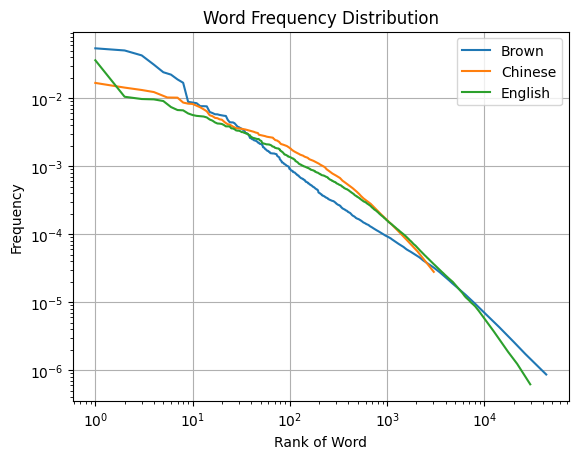

In [91]:
import matplotlib.pyplot as plt
def print_zipfs_law(df_word_freq, label):
    # assume the two columns are named "terms" and "frequency"
    df_word_freq['rank'] = df_word_freq['frequency'].rank(ascending=False)
    # for the same rank there might be more than one word
    df_zipf = df_word_freq.groupby('rank').agg({'frequency': 'mean'}).reset_index()

    plt.plot(df_zipf['rank'], df_zipf['frequency'], label=label)
    
    plt.yscale('log')  # Set y-axis to logarithmic scale
    plt.xscale('log')  # Set y-axis to logarithmic scale
    plt.xlabel('Rank of Word')
    plt.ylabel('Frequency')
    plt.title('Word Frequency Distribution')
    plt.legend()
    plt.grid(True)
print_zipfs_law(df_brown_word_freq, label='Brown')
print_zipfs_law(df_chinese_word_freq, label='Chinese')
print_zipfs_law(df_english_word_freq, label='English')

todo: Try to the log of 2?

### Rank bags and length by letter

We know that the length of a word is related to the rank of the word, typically, the longer a word is, the less likely it will occur. Let's check if it is also true for programming languages for each language groups. 

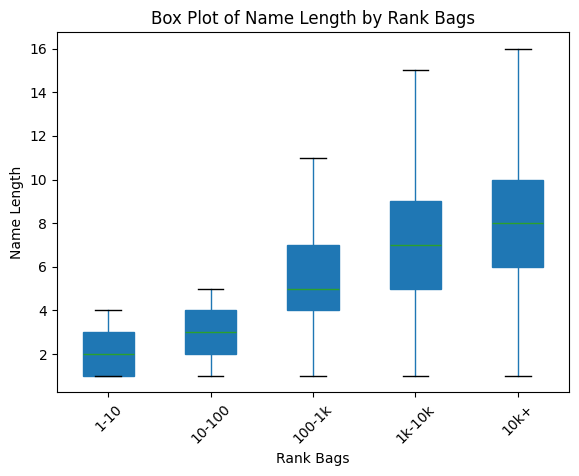

In [92]:
def plot_rank_bag_to_letter_len(df_word_freq):
    # assume it have columns "terms", and "frequency"
    df_word_freq['rank'] = df_word_freq['frequency'].rank(ascending=False)
    df_word_freq['lengthByLetter'] = df_word_freq['terms'].apply(len)
    # map rank to bins
    bins = [0, 10, 100, 1000, 10000, 100000]
    labels = ['1-10', '10-100', '100-1k', '1k-10k', '10k+']
    df_word_freq['rankBag'] = pd.cut(df_word_freq['rank'], bins=bins, labels=labels, right=False)
    # plot the boxplot for each bag: we don't show fliers
    df_word_freq.boxplot(column='lengthByLetter', by='rankBag', grid=False, patch_artist=True, showfliers=False)
    # Adding titles and labels
    plt.title('Box Plot of Name Length by Rank Bags')
    plt.suptitle('')
    plt.xlabel('Rank Bags')
    plt.ylabel('Name Length')
    plt.xticks(rotation=45)
    plt.show()
plot_rank_bag_to_letter_len(df_brown_word_freq)

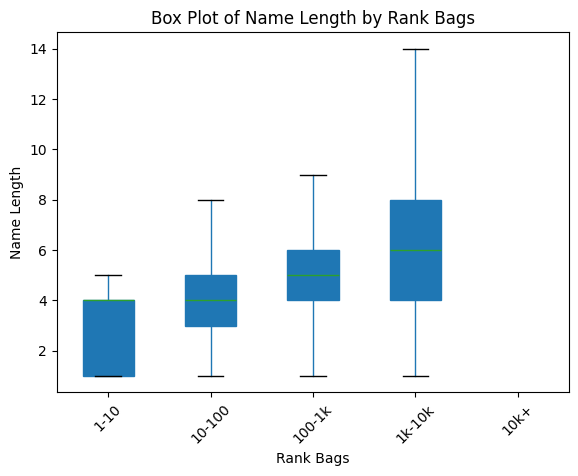

In [93]:
plot_rank_bag_to_letter_len(df_chinese_word_freq)


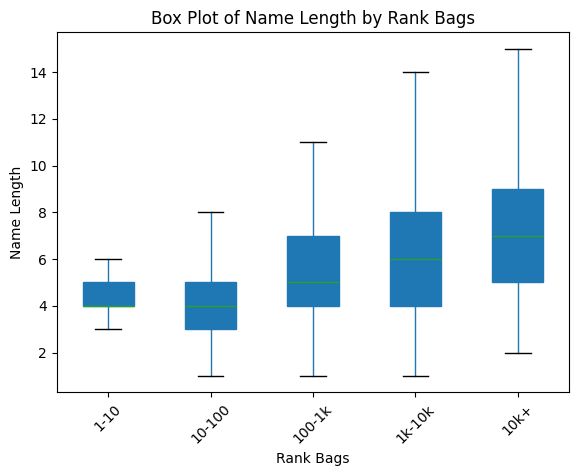

In [94]:
plot_rank_bag_to_letter_len(df_english_word_freq)

Let's see the percentage: In Nitsan's paper, it is the rank of "whole name" vs. the number of words in a name. I don't understand this approach, so let's ask Dror this weekend. 
For now let's do percentage of length by letter according to rank. 

/var/folders/2q/npr5yhgs2_553xj46qkrcsdh0000gn/T/ipykernel_5579/332043358.py:10: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot_df = df_word_freq.pivot_table(index='rankBag', columns='lengthByLetter', aggfunc='size', fill_value=0)


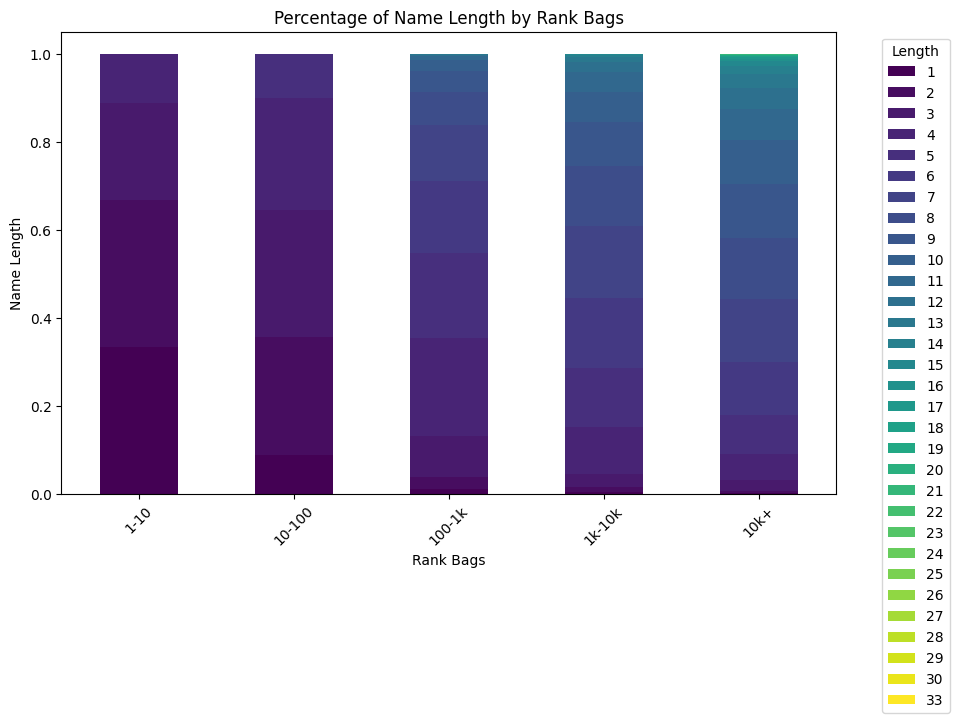

In [95]:
def plot_rank_bag_to_letter_len(df_word_freq):
    # assume it have columns "terms", and "frequency"
    df_word_freq['rank'] = df_word_freq['frequency'].rank(ascending=False)
    df_word_freq['lengthByLetter'] = df_word_freq['terms'].apply(len)
    # map rank to bins
    bins = [0, 10, 100, 1000, 10000, 100000]
    labels = ['1-10', '10-100', '100-1k', '1k-10k', '10k+']
    df_word_freq['rankBag'] = pd.cut(df_word_freq['rank'], bins=bins, labels=labels, right=False)
    # calculate for each rankBag, what is the number of each length number
    pivot_df = df_word_freq.pivot_table(index='rankBag', columns='lengthByLetter', aggfunc='size', fill_value=0)
    pivot_df = pivot_df.div(pivot_df.sum(axis=1), axis=0)
    # plot the boxplot for each bag: we don't show fliers
    pivot_df.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='viridis')
    # Adding titles and labels
    plt.title('Percentage of Name Length by Rank Bags')
    plt.xlabel('Rank Bags')
    plt.ylabel('Name Length')
    plt.xticks(rotation=45)
    plt.legend(title='Length', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.show()
    
plot_rank_bag_to_letter_len(df_brown_word_freq)

/var/folders/2q/npr5yhgs2_553xj46qkrcsdh0000gn/T/ipykernel_5579/332043358.py:10: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot_df = df_word_freq.pivot_table(index='rankBag', columns='lengthByLetter', aggfunc='size', fill_value=0)


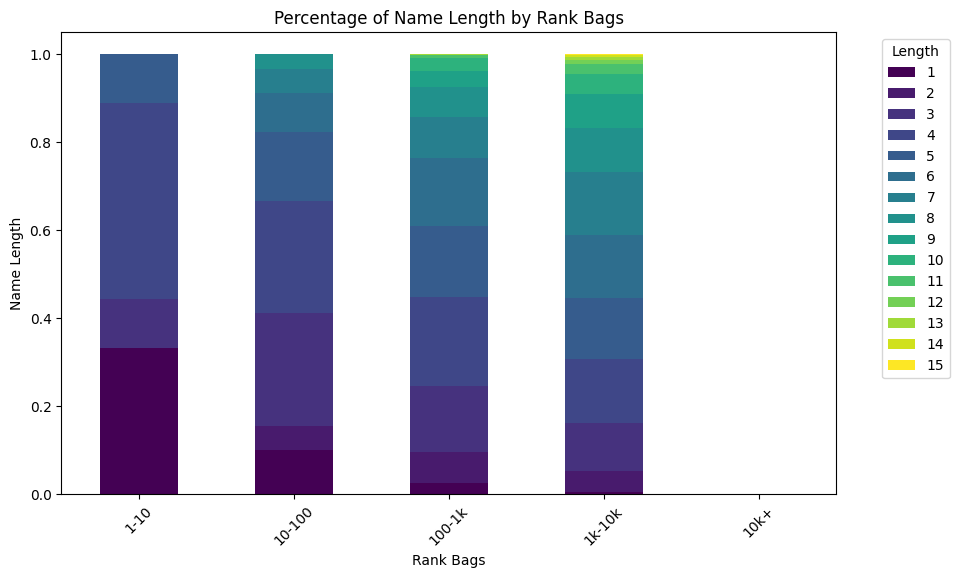

In [96]:
plot_rank_bag_to_letter_len(df_chinese_word_freq)


/var/folders/2q/npr5yhgs2_553xj46qkrcsdh0000gn/T/ipykernel_5579/332043358.py:10: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot_df = df_word_freq.pivot_table(index='rankBag', columns='lengthByLetter', aggfunc='size', fill_value=0)


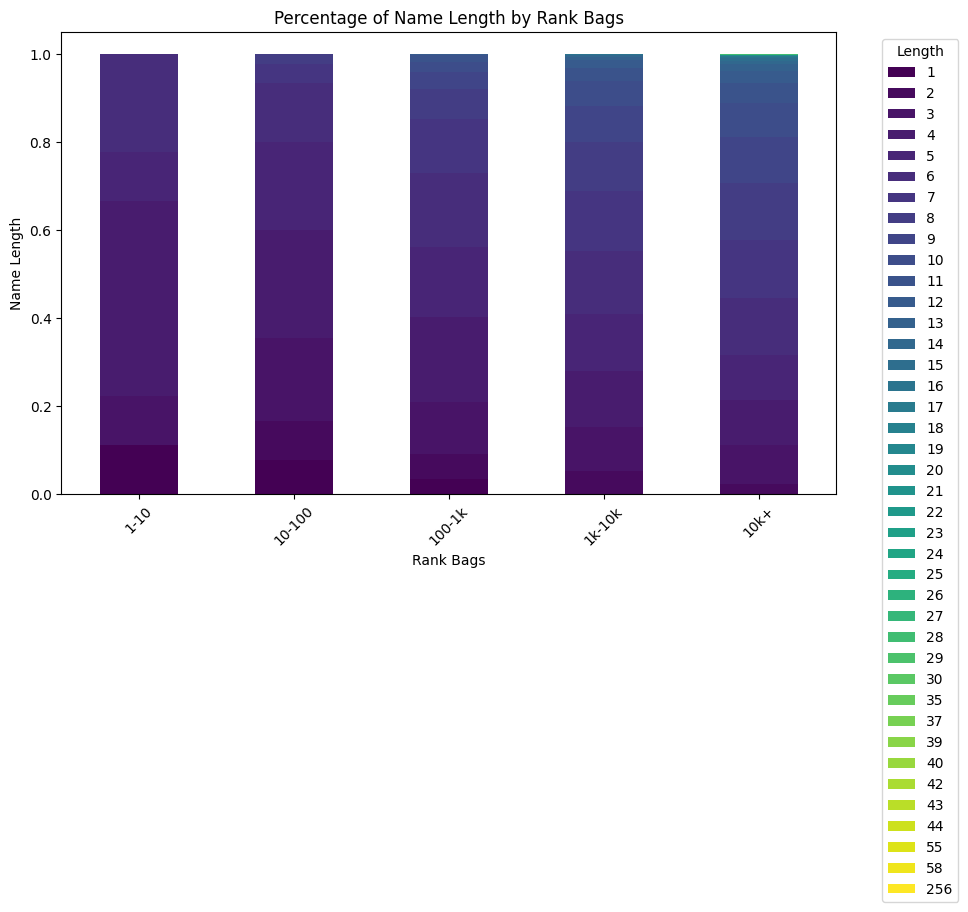

In [97]:
plot_rank_bag_to_letter_len(df_english_word_freq)


## Vocabulary

### Number of Real Words

Let's check if the words are real words

In [98]:
from nltk.corpus import words

english_dictionary = set(words.words())


In [99]:
def lookup_terms(term):
    return term.lower() in english_dictionary

def percentage_of_real_word(df_word_frequency):
    # assuming that the df_word_frequency have "terms" column
    df_word_frequency['real_word'] = df_word_frequency['terms'].apply(lookup_terms)
    return df_word_frequency['real_word'].mean() * 100


In [100]:
print("Real Word Percentage in Chinese Projects:")
print(percentage_of_real_word(df_chinese_word_freq))
print("Real Word Percentage in English Projects:")
print(percentage_of_real_word(df_english_word_freq))
print("Real Word Percentage in Brown:")
print(percentage_of_real_word(df_brown_word_freq))


Real Word Percentage in Chinese Projects:
52.68173155458753
Real Word Percentage in English Projects:
35.780848792591094
Real Word Percentage in Brown:
45.89970922453931


### Size of Vocabulary

In [101]:
print("The size of vocabulary of Chinese-speaking projects is")
print(flattened_words_chinese.nunique())
print("The size of vocabulary of English-speaking projects is")
print(flattened_words_english.nunique())


The size of vocabulary of Chinese-speaking projects is
3673
The size of vocabulary of English-speaking projects is
34661
